In [2]:
import pandas as pd

Importing our data

In [3]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Mr Abbey\Exam\BPD_Part_1_Victim_Based_Crime_Data.csv")
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1
...,...,...,...,...,...,...,...,...,...,...,...,...
285802,01/01/2011,22:15:00,4D,6800 MCCLEAN BD,AGG. ASSAULT,I,HANDS,423.0,NORTHEASTERN,Hamilton Hills,"(39.3704700000, -76.5670500000)",1
285803,01/01/2011,22:30:00,6J,3000 ODONNELL ST,LARCENY,I,NaN,232.0,SOUTHEASTERN,Canton,"(39.2804600000, -76.5727300000)",1
285804,01/01/2011,23:00:00,7A,2500 ARUNAH AV,AUTO THEFT,O,NaN,721.0,WESTERN,Evergreen Lawn,"(39.2954200000, -76.6592800000)",1
285805,01/01/2011,23:25:00,4E,100 N MONROE ST,COMMON ASSAULT,I,HANDS,714.0,WESTERN,Penrose/Fayette Street Outreach,"(39.2899900000, -76.6470700000)",1


Checking for missing values using isnull

In [34]:
missing_values = df.isnull().sum()
missing_values

CrimeDate               0
CrimeTime               0
CrimeCode               0
Location             1623
Description             0
Inside/Outside       4196
Weapon             188411
Post                  191
District               58
Neighborhood         1701
Location 1           1619
Total Incidents         0
dtype: int64

The weapon columns have over half of the values missing, using dropna() will affect over 50% of our data, so we'd drop the weapon column first because it won't be useful in our analysis.

In [35]:
df = df.drop(columns = 'Weapon')

In [36]:
df
missing_values = df.isnull().sum()
missing_values

CrimeDate             0
CrimeTime             0
CrimeCode             0
Location           1623
Description           0
Inside/Outside     4196
Post                191
District             58
Neighborhood       1701
Location 1         1619
Total Incidents       0
dtype: int64

Now that we have dropped the weapon column, we can now go ahead to drop missing values in our data frame using dropna() without affecting a large number of our dataset

In [37]:
df = df.dropna()

In [38]:
#checking to see and confirm if missing values has been dropped
missing_values = df.isnull().sum()
missing_values

CrimeDate          0
CrimeTime          0
CrimeCode          0
Location           0
Description        0
Inside/Outside     0
Post               0
District           0
Neighborhood       0
Location 1         0
Total Incidents    0
dtype: int64

In [39]:
# Determine the top 5 crime codes using .value_counts()
top_5_crime_codes = df['CrimeCode'].value_counts().head(5)
top_5_crime_codes

CrimeCode
4E    46627
6D    38033
5A    27161
7A    24816
6G    16262
Name: count, dtype: int64

In [40]:
# Convert 'CrimeDate' to datetime to make it easy to manipulate date and time
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df.dtypes

CrimeDate          datetime64[ns]
CrimeTime                  object
CrimeCode                  object
Location                   object
Description                object
Inside/Outside             object
Post                      float64
District                   object
Neighborhood               object
Location 1                 object
Total Incidents             int64
dtype: object

In [41]:
#year with the highest number of crimes
year_counts = df['CrimeDate'].dt.year.value_counts()
highest_crime_year = year_counts.idxmax()
highest_crime_year

2011

In [42]:
# Grouping data by 'District' to enable us calculate total incidents
total_incidents = df.groupby('District').size()
print(total_incidents)

District
CENTRAL         33068
EASTERN         23647
Gay Street          1
NORTHEASTERN    44179
NORTHERN        31371
NORTHWESTERN    28205
SOUTHEASTERN    38824
SOUTHERN        32383
SOUTHWESTERN    25616
WESTERN         22643
dtype: int64


In [43]:
#Pivot Table pivot_table() to show crime counts for each 'CrimeCode' by district.
pivot_table = pd.pivot_table(df, values='Total Incidents', index='District', columns='CrimeCode', aggfunc='sum')
print(pivot_table)

CrimeCode        1F    1K    1O     2A    2B     3AF   3AJF  3AJK  3AJO  \
District                                                                  
CENTRAL        69.0  24.0   9.0  184.0  21.0   890.0   74.0  11.0  11.0   
EASTERN       180.0  21.0  11.0  137.0  29.0   518.0   63.0   8.0   2.0   
Gay Street      NaN   NaN   NaN    NaN   NaN     NaN    NaN   NaN   NaN   
NORTHEASTERN  170.0  20.0  24.0  211.0  32.0  1227.0  135.0   7.0   9.0   
NORTHERN       83.0  13.0  12.0  158.0  29.0   928.0   99.0   3.0   6.0   
NORTHWESTERN  156.0  16.0  16.0  147.0  24.0   907.0  140.0   9.0   8.0   
SOUTHEASTERN   62.0  16.0   5.0  157.0  20.0   930.0   67.0  12.0   5.0   
SOUTHERN      105.0  14.0  11.0  177.0  32.0   605.0   69.0  12.0   6.0   
SOUTHWESTERN  177.0  14.0   7.0  143.0  21.0   601.0  105.0   7.0   3.0   
WESTERN       204.0  21.0  10.0  146.0  24.0   548.0   96.0   9.0   7.0   

CrimeCode       3AK  ...  8EO  8EV   8FO  8FV  8GO  8GV     8H   8I    8J  \
District             .

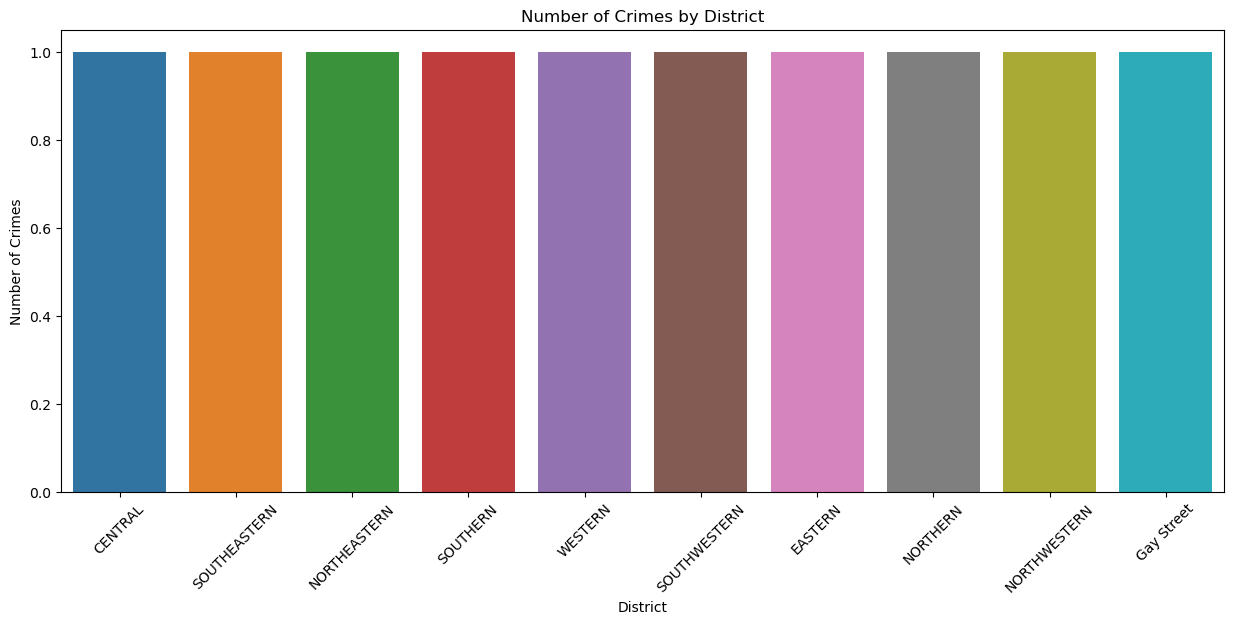

In [44]:
#Visualizing the number of crimes in each district with a bar plot using matplotlib.pyplot
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
sns.barplot(x='District', y='Total Incidents', data=df)
plt.xlabel('District')
plt.xticks(rotation=45)
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes by District')
plt.show()

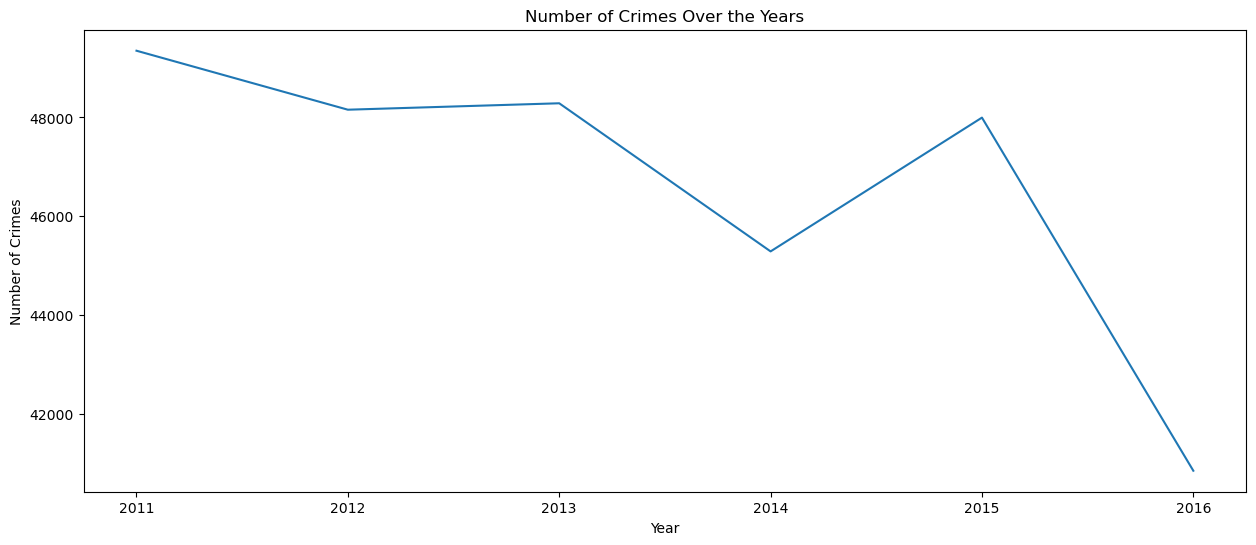

In [45]:
#time series plot of crime incidents over the years with plot() on a datetime-indexed DataFrame

df_grouped = df.groupby(df['CrimeDate'].dt.year)['Total Incidents'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.plot(df_grouped['CrimeDate'], df_grouped['Total Incidents'])
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Over the Years')
plt.show()

In [46]:
# Generate total monthly data
df_monthly = df.set_index('CrimeDate').resample('M').count()

In [47]:
#stationarity of crime counts with the Augmented Dickey-Fullertest using adfuller() from statsmodels.tsa.stattools 

from statsmodels.tsa.stattools import adfuller
result = adfuller(df_monthly['CrimeCode'])
print('Test Statistic:', result[0])
print('P-value:', result[1])

Test Statistic: -0.8814038628568863
P-value: 0.7940346939962724


In [48]:
# Filter for 'LARCENY' crimes
larceny_crimes = df[df['Description'].str.contains('LARCENY')]

# Set 'CrimeDate' as index and resample to monthly frequency
monthly_larceny_counts = larceny_crimes.set_index('CrimeDate').resample('M').count()

# Rename the column to 'Count'
monthly_larceny_counts = monthly_larceny_counts.rename(columns={'Description': 'Count'})

# Print the result
print(monthly_larceny_counts)

            CrimeTime  CrimeCode  Location  Count  Inside/Outside  Post  \
CrimeDate                                                                 
2011-01-31       1152       1152      1152   1152            1152  1152   
2011-02-28       1004       1004      1004   1004            1004  1004   
2011-03-31       1500       1500      1500   1500            1500  1500   
2011-04-30       1342       1342      1342   1342            1342  1342   
2011-05-31       1457       1457      1457   1457            1457  1457   
...               ...        ...       ...    ...             ...   ...   
2016-07-31       1307       1307      1307   1307            1307  1307   
2016-08-31       1394       1394      1394   1394            1394  1394   
2016-09-30       1428       1428      1428   1428            1428  1428   
2016-10-31       1489       1489      1489   1489            1489  1489   
2016-11-30        502        502       502    502             502   502   

            District  Ne

In [49]:
# Define a custom function to categorize 'CrimeTime'
def categorize_time(time):
    if '00:00' <= time < '06:00':
        return 'Night'
    elif '06:00' <= time < '12:00':
        return 'Morning'
    elif '12:00' <= time < '18:00':
        return 'Afternoon'
    else:
        return 'Evening'

In [50]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
# Convert 'CrimeDate' column to DateTime
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'])
df.set_index('CrimeDate', inplace=True)

# Resample the DataFrame by day
daily_data = df.resample('D').size()

In [52]:
#Split data into training and testing sets:
train_size = int(len(daily_data) * 0.8)
train_data, test_data = daily_data[:train_size], daily_data[train_size:]

In [53]:
#Building and training the SARIMAX model:
# Define SARIMAX model
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # Seasonal period of 7 days
sarimax_model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)

# Fit model
sarimax_result = sarimax_model.fit()

In [54]:
#Forecast future crime counts:
forecast = sarimax_result.get_forecast(steps=len(test_data))
forecast_values = forecast.predicted_mean
forecast_values

2015-09-11    153.538387
2015-09-12    144.893550
2015-09-13    137.730159
2015-09-14    152.209827
2015-09-15    147.166985
                 ...    
2016-11-08    160.937043
2016-11-09    159.160931
2016-11-10    159.387611
2016-11-11    166.935146
2016-11-12    158.823319
Freq: D, Name: predicted_mean, Length: 429, dtype: float64

RMSE: 32.031294740069995


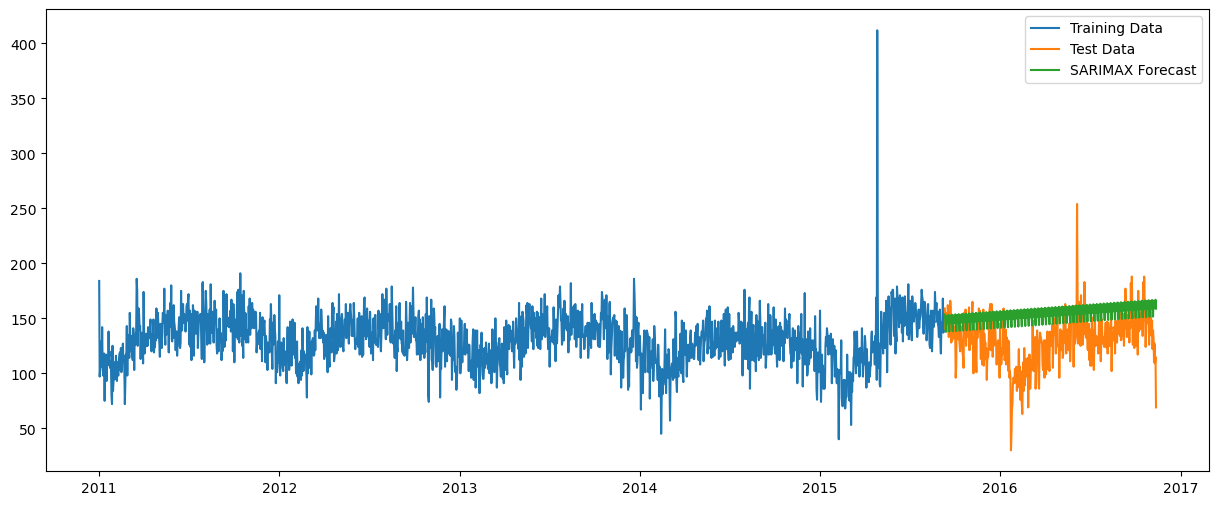

In [55]:
#Evaluate the SARIMAX model (optional):
# Calculate RMSE or any other metric of your choice
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print("RMSE:", rmse)

# Visualize the forecast
plt.figure(figsize=(15,6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast_values, label='SARIMAX Forecast')
plt.legend()
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

#Calculate daily crime counts per district
daily_crime_counts = df.groupby('District').resample('D').size().reset_index(name='Count')

#Prepare the data for predictive modeling
# Extract features and target variable
X = daily_crime_counts.pivot_table(index='CrimeDate', columns='District', values='Count', fill_value=0)
y = X.idxmax(axis=1).values  # Target variable (district with most crimes)

#Select an appropriate predictive model
model = RandomForestClassifier()

#Train and test the predictive model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8764568764568764
Confusion Matrix:
[[ 31   0   4   3   0   1   0   1   0]
 [  1   3   1   0   0   3   1   0   0]
 [  1   0 183   0   1   3   2   0   0]
 [  2   0   2  32   0   1   0   0   0]
 [  1   0   4   2   8   0   1   0   0]
 [  1   0   0   0   1  84   1   0   0]
 [  2   0   4   1   0   3  34   0   0]
 [  0   0   1   0   0   2   1   1   0]
 [  0   0   1   0   0   0   0   0   0]]


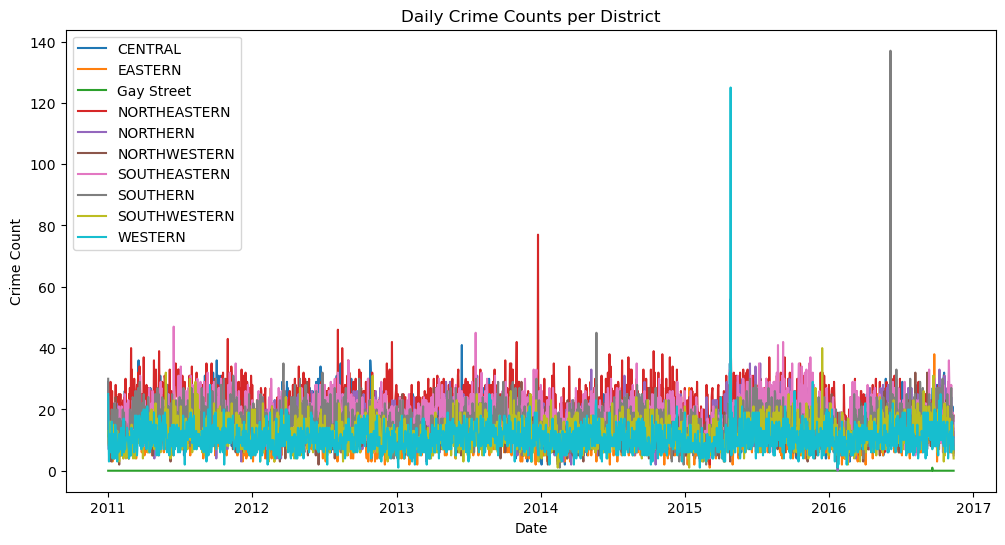

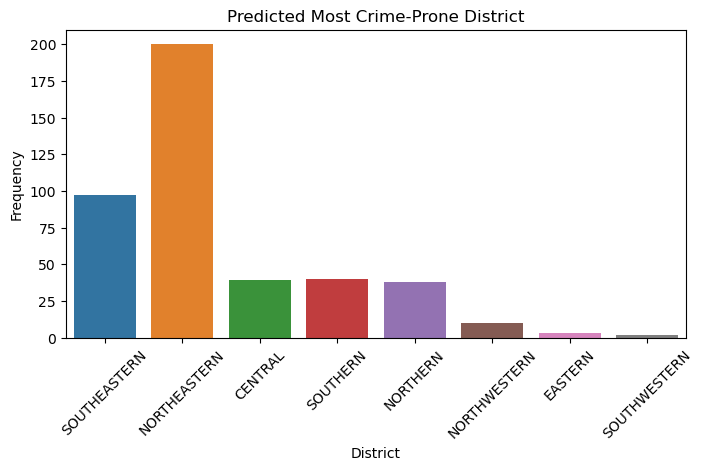

In [57]:
# Plot daily crime counts per district
plt.figure(figsize=(12, 6))
for district in X.columns:
    plt.plot(X.index, X[district], label=district)

plt.title('Daily Crime Counts per District')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

# Plot predictions made by the model
predictions_series = pd.Series(predictions)  # Convert predictions to a Series
plt.figure(figsize=(8, 4))
sns.countplot(x=predictions_series)  # Plot countplot using x parameter
plt.title('Predicted Most Crime-Prone District')
plt.xlabel('District')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

We chose RandomForestClassifier as it's a versatile and commonly used model for classification tasks. It can handle non-linear relationships between features and the target variable and is less prone to overfitting.

Assumptions:
Past crime counts are indicative of future crime trends.
Distribution of crime counts per district remains relatively stable over time.

Prediction Implications:
Predicting which district will have the most crimes can help allocate resources for law enforcement more effectively. However, predictions may be affected by various factors such as changes in policing strategies, demographics, or socioeconomic conditions. It's essential to regularly update and validate the model to ensure its accuracy and relevance.